In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans

def plot_cart(color_space, color=None):
    '''
    description: plot color space graphs
    args:
        rgb (ndarray): [[r_1, g_1, b_1], [r_2, g_2, b_2], ... , [r_n, g_n, b_n]]
    '''
    if color is None:
        color = color_space
    r = color_space[:, 0]
    g = color_space[:, 1]
    b = color_space[:, 2]

    fig = plt.figure()#figsize=(12, 10))
    ax = Axes3D(fig)

    ax.scatter(r, g ,b, c=color/255)
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    plt.show()

    f, ax = plt.subplots(1, 3, figsize=(16,4))
    ax[0].scatter(r, g, c=color/255,marker='o')
    ax[0].set_xlabel('R')
    ax[0].set_ylabel('G')

    ax[1].scatter(r, b, c=color/255,marker='o')
    ax[1].set_xlabel('R')
    ax[1].set_ylabel('B')

    ax[2].scatter(g, b, c=color/255,marker='o')
    ax[2].set_xlabel('G')
    ax[2].set_ylabel('B')
    plt.show()
    
def kmean_color(color_space, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(color_space)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    color_space_assigned = kmeans.predict(color_space)
    cluster_colors = np.array([[0,0,0]]* len(color_space_assigned), dtype=np.uint8)
    
    for i, label in enumerate(color_space_assigned):
        cluster_colors[i] = centroids[label]
    print('KMeans \t k = {}'.format(k))
    
    tmp = cv2.cvtColor(np.array([cluster_colors]), cv2.COLOR_LAB2RGB)
    plot_cart(color_space, tmp[0,:,:])

Number of points sampled: 7963


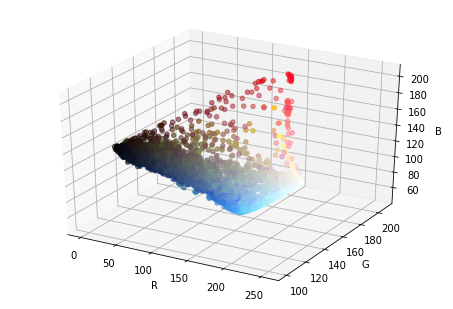

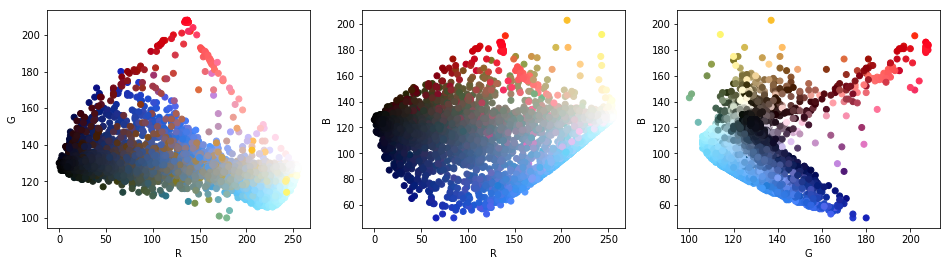

KMeans 	 k = 8


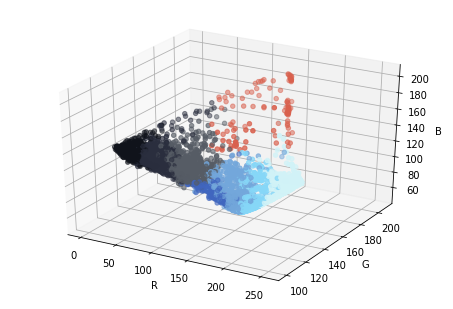

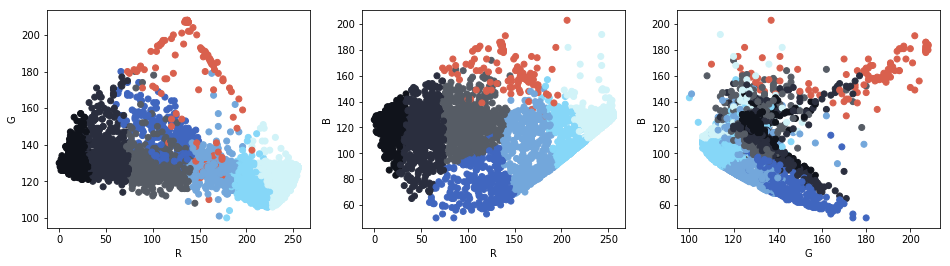

In [2]:
img = cv2.imread('NZ.jpg') # BGR
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

flat_bgr = img.reshape(img.shape[0] * img.shape[1], 3) # make RGB values into a flat array
flat_lab = lab.reshape(lab.shape[0] * lab.shape[1], 3) # make RGB values into a flat array

sample_rate = 500
sample_bgr = np.array([flat_bgr[i] for i in range(0, len(flat_bgr), sample_rate)])
sample_lab = np.array([flat_lab[i] for i in range(0, len(flat_lab), sample_rate)])

sample_rgb = sample_bgr[:, ::-1]
print('Number of points sampled:', len(sample_bgr))

plot_cart(sample_lab, sample_rgb)
kmean_color(sample_lab, 8)

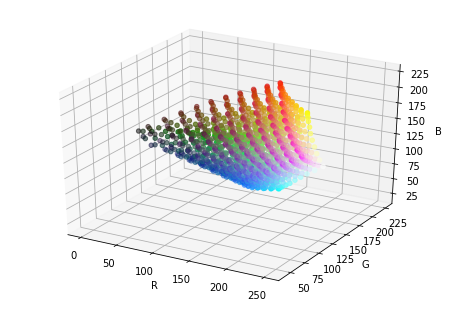

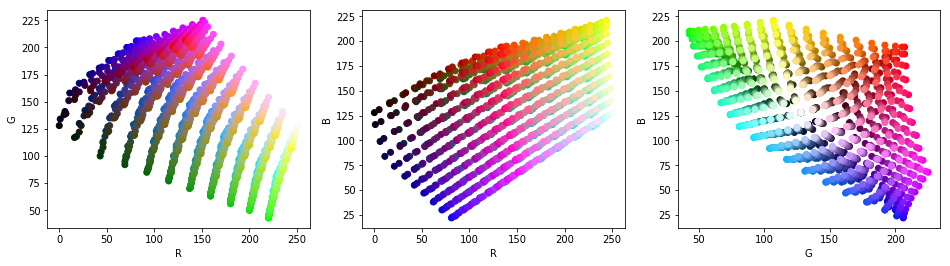

KMeans 	 k = 8


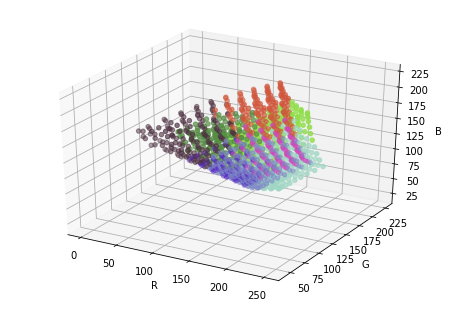

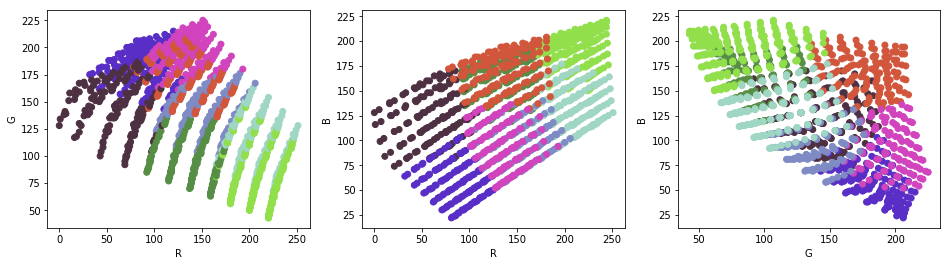

In [3]:
step = 25
rgb_uniform = np.array([[0,0,0]]* (255//step + 1)**3, dtype=np.uint8)

for i, r in enumerate(range(0,255, step)):
    for j, g in enumerate(range(0, 255, step)):
        for k, b in enumerate(range(0, 255, step)):
            rgb_uniform[i * (255//step + 1)**2 + 1 + (255//step + 1) * j + k - 1] = np.array([r,g,b], dtype=np.uint8)
bgr_uniform = rgb_uniform[:,::-1]
bgr_3d = np.array([rgb_uniform[:,::-1]], dtype=np.uint8)

lab_3d = cv2.cvtColor(bgr_3d, cv2.COLOR_BGR2LAB)
lab_uniform = lab_3d.reshape(lab_3d.shape[0] * lab_3d.shape[1], 3)


plot_cart(lab_uniform, rgb_uniform)
kmean_color(lab_uniform, 8)
